# FT_Linear_Regression
### An Introduction to Machine Learning

#### Packages used
- **pandas** to read_csv
- **matplotlib** for data visualization
- **seaborn** for matplotlib additions

# Assignment

### 1.
Predict the price of a car for a given mileage. When you launch the program, it should prompt you for a mileage, and then give you back the estimated price for that mileage. The programm will use the following hypothesis

### $estimatedPrice(mileage) = \theta_0 + (\theta_1 * mileage)$

In [1]:
# Initializing Theta- and Theta1
t0 = 8000
t1 = -2

In [2]:
# Calculate estimated price given the hypothesis
def estimatedPrice(mileage):
    return(t0 + t1*mileage)

# Prompt user for mileage, return estimated price for that mileage
def promptUser():
    tmp = float(input('Mileage '))
    print('Estimated Price: ', round(estimatedPrice(tmp),2), '$')

In [3]:
promptUser()

Mileage 1000
Estimated Price:  6000.0 $


### 2.
Read the data, perform a linear regression and save the variables $\theta_0$ and $\theta_1$ for part 1.

You will use the following formulas and choose a value for $m$:

### $tmp\theta_0 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}(estimatedPrice(mileage[i] - price[i])$

### $tmp\theta_1 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}(estimatedPrice(mileage[i] - price[i])*mileage[i]$

Don't forget to simultaneously update $\theta_0$ and $\theta_1$

In [4]:
import pandas as pd
data = pd.read_csv('data.csv')

## Linear Regression from scratch
### $Y = \theta_0 + \theta_1X$
## $\theta_1 = \frac{\sum_{i=1}^{m}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{m}(x_i-\bar{x})^2}$
### $\theta_0 = \bar{y}-\theta_1\bar{x}$

In [5]:
def linreg(data):
    X = data.km
    Y = data.price
    
    x_bar = sum(X)/len(X)
    y_bar = sum(Y)/len(Y)
    
    t1 = sum((X-x_bar)*(Y-y_bar))/sum((X-x_bar)*(X-x_bar))
    t0 = y_bar - t1*x_bar
    
    return(t0, t1)

In [6]:
# Calculate Theta0 and Theta1 using OLS
t0, t1 = linreg(data)
t0, t1

(8499.599649933216, -0.0214489635917023)

## Visualization

In [7]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
# Set theme
sns.set_style('whitegrid')
# Estimated Price for the dataset range
abline_values = [t1 * i + t0 for i in data.km]

(0, 253364.14921389337)

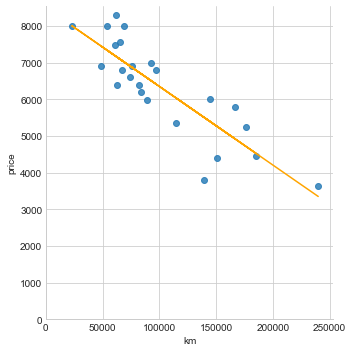

In [8]:
# Scatter plot
sns.lmplot(x='km', y='price', data=data, fit_reg=False)
# Calculated regression line
plt.plot(data.km, abline_values, 'orange')
# Aesthetics
plt.ylim(0, None)
plt.xlim(0, None)

## Gradient Descent
To improve algorithm performance we need to scale the variables first

In [9]:
def normalize(data):
    dataNew = data
    for column in data:
        mean = sum(data[column])/len(data[column])
        sd = data[column]-mean
        sd = (sum(sd*sd)/(len(sd)-1))**(0.5)
        dataNew[column] = (data[column]-mean)/sd
    return(dataNew)

In [10]:
nData = normalize(data)
print('        Minimum  Maximum')
print('km    ', round(min(nData.km),6), round(max(nData.km),6))
print('price ', round(min(nData.price),6), round(max(nData.price),6))

        Minimum  Maximum
km     -1.483975 2.637603
price  -2.032224 1.483848


Theta0:   0.0
Theta1:  -0.85614


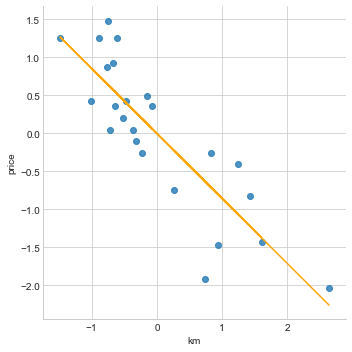

In [11]:
t0, t1 = linreg(nData)
t0_lin = t0
t1_lin = t1

print('Theta0:  ', round(t0, 5))
print('Theta1: ', round(t1, 5))

# Scatter plot
sns.lmplot(x='km', y='price', data=nData, fit_reg=False)
# Calculated regression line
abline_values = [t1 * i + t0 for i in nData.km]
plt.plot(nData.km, abline_values, 'orange')
plt.show()

### $tmp\theta_0 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}estimatedPrice(mileage[i]) - price[i]$

### $tmp\theta_1 = learningRate * \frac{1}{m}\sum_{i=0}^{m-1}(estimatedPrice(mileage[i]) - price[i])*mileage[i]$

# Gradient Descent

In [12]:
t0, t1 = -3, 3
lr = 0.01
m = len(nData.km)
tmp1 = 10
i = 0
loss_old = 0
loss_new = 1
precision = 0.00000001
max_iters = 10000
step = 1
save_counter = 0

descent = pd.DataFrame(columns=('iteration', 't0', 't1', 'step_size'))

def lossFunction(t0, t1):
    return((1/len(nData.price)) * sum((nData.price - (t0 + t1*nData.km))**2))

while step>precision and i<max_iters:
    tmp0 = lr/m*sum(estimatedPrice(nData.km) - nData.price)
    tmp1 = lr/m*sum((estimatedPrice(nData.km) - nData.price)*nData.km)
    
    loss_old = lossFunction(t0, t1)*10000
    loss_new = lossFunction(t0 - tmp0, t1 - tmp1)*10000
    step = abs(loss_old - loss_new)
    
    if(save_counter == 20 or i == 0):
        new = pd.DataFrame([[i, round(t0, 8), round(t1, 8), step]], columns=('iteration', 't0', 't1', 'step_size'))
        descent = descent.append(new)
        save_counter = 0
    
    t0 = t0 - tmp0
    t1 = t1 - tmp1
    i += 1
    save_counter += 1
    
t0_grad = t0
t1_grad = t1

new = pd.DataFrame([[i, round(t0, 8), round(t1, 8), step]], columns=('iteration', 't0', 't1', 'step_size'))
descent = descent.append(new)

descent = descent.reset_index(drop=True)
descent['loss'] = 100000



for index, row in descent.iterrows():
    descent.loc[index, 'loss'] = lossFunction(row['t0'], row['t1'])

descent.head().append(descent.tail())

,iteration,t0,t1,step_size,loss
0,0,-3,3,4.509208e+03,23.506135
1,20,-2.45372,2.32448,3.047398e+03,15.971463
2,40,-2.00692,1.7673,2.059622e+03,10.879253
3,60,-1.64147,1.30772,1.392115e+03,7.437517
4,80,-1.34257,0.928654,9.410045e+02,5.111151
65,1300,-6.35e-06,-0.856125,4.441245e-08,0.255899
66,1320,-5.19e-06,-0.856128,3.012383e-08,0.255899
67,1340,-4.25e-06,-0.85613,2.043271e-08,0.255899
68,1360,-3.48e-06,-0.856132,1.386024e-08,0.255899
69,1378,-2.9e-06,-0.856133,9.965788e-09,0.255899


# Plotting Gradient Descent Regression Line

In [13]:
# 2D/3D plotting packages
from mpl_toolkits.mplot3d import Axes3D
# Colors Schemes
from matplotlib import cm
# making arrays quickly for a given range using np.arange 
import numpy as np

Theta0:   -0.0
Theta1:  -0.85613


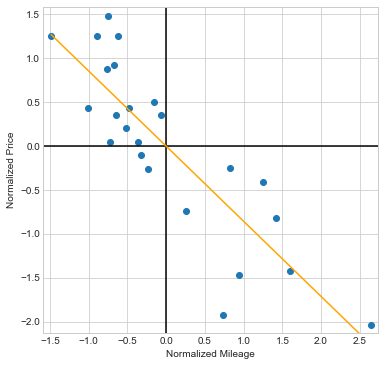

In [14]:
km_ab = [min(nData.km), max(nData.km)]
nData['ab'] = t0_lin + t1_lin * nData.km
lin_reg_ab = [float(nData.ab[nData.km == min(nData.km)]), float(nData.ab[nData.km == max(nData.km)])]
hv_line = [0, 0]

print('Theta0:  ', round(t0, 5))
print('Theta1: ', round(t1, 5))

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.plot([min(nData.km)-.1, max(nData.km)+0.1], hv_line, color = 'black')
ax.plot(hv_line, [min(nData.price)-.1, max(nData.price)+0.1], color = 'black')
ax.plot(km_ab, lin_reg_ab, color = 'orange')
ax.scatter(nData.km, nData.price)

ax.set_xlabel('Normalized Mileage')
ax.set_ylabel('Normalized Price')
ax.set_xlim(min(nData.km)-.1, max(nData.km)+0.1)
ax.set_ylim(min(nData.price)-.1, max(nData.price)+0.1)
plt.show()

# Plotting Loss Level Curves (Jacobian)

In [15]:
t0_range = (np.arange(0, 101)-50)*3/50
t1_range = t0_range

loss = [[0 for t0 in range(len(t0_range))] for t1 in range(len(t1_range)) ]

for i in range(len(t1_range)):
    for j in range(len(t0_range)):
        loss[i][j] = (1/len(nData.price)) * sum((nData.price - (((j-50)*3/50) + ((i-50)*3/50)*nData.km))**2)
        
loss_grad = loss[int((t1_grad*50/3)+50)][int((t0_grad*50/3)+50)]

                     t0   t1      Loss
Gradient Descent:    -0.0 -0.85613 0.2613428324697172
Least Square Error:  0.0 -0.85614 0.2577428324697171


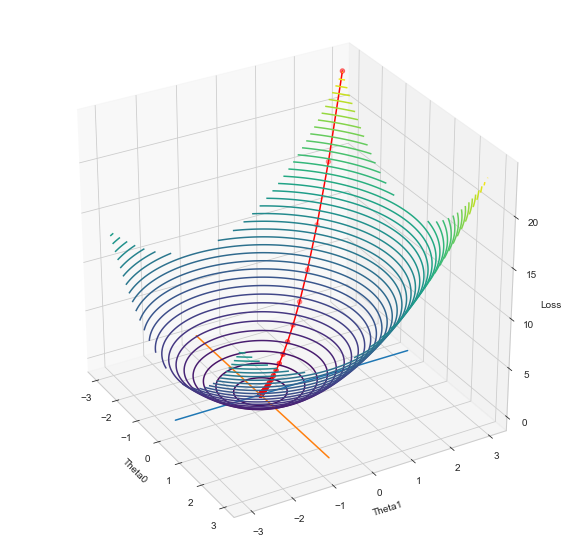

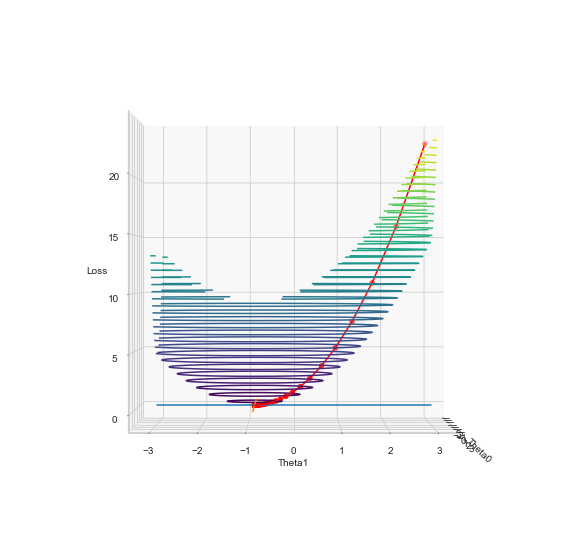

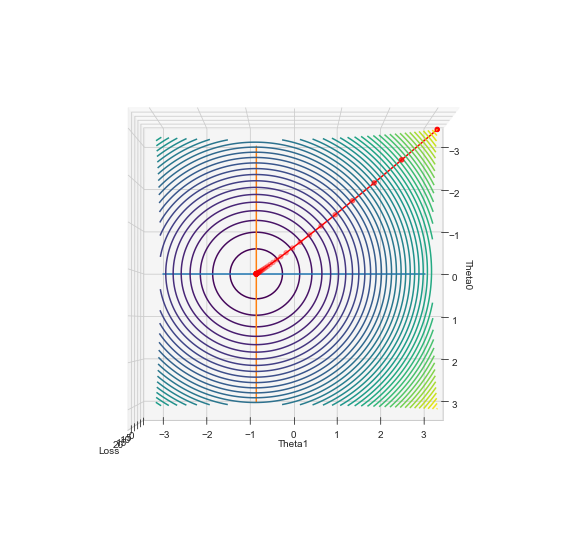

In [16]:
print('                     t0   t1      Loss')
print('Gradient Descent:   ', round(t0_grad, 5), round(t1_grad, 5), loss[int((t1_grad*50/3)+50)][int((t0_grad*50/3)+50)])
print('Least Square Error: ', round(t0_lin, 5), round(t1_lin, 5), loss[int((t1_lin*50/3)+50)][int((t0_lin*50/3)+50)])

def makeplot(a, b):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection = '3d')
    ax.contour3D(t0_range, t1_range, loss, 45, cmap = 'viridis')
    ax.plot3D(xs = np.linspace(t0_grad, t0_grad, 2), ys = np.linspace(-3,3,2), zs = np.linspace(loss_grad,loss_grad,2))
    ax.plot3D(xs = np.linspace(-3, 3, 2), ys = np.linspace(t1_grad,t1_grad,2), zs = np.linspace(loss_grad,loss_grad,2))
    ax.scatter(xs = descent.t0, ys = descent.t1, zs = descent.loss, color = 'red')
    ax.plot3D(xs = descent.t0, ys = descent.t1, zs = descent.loss, color = 'red')
    ax.view_init(a, b)
    ax.set_xlabel('Theta0')
    ax.set_ylabel('Theta1')
    ax.set_zlabel('Loss')
    plt.show()
    
makeplot(30, -30)
makeplot(0, 0)
makeplot(89, 0)

# Not working: clean code gradient descent with lambda functions

In [ ]:
# Initial starting values of Theta0 and Theta1
cur_t0, cur_t1 = 0, 0
# learning rate
rate = 0.01
# When do we stop the algorithm
precision = 0.000001
previous_step_size = 1
max_iters = 10000
# counter
iters = 0
printcount = 0
# Number of observations
m = len(nData.km)
# Gradient function
tmp0 = lambda x: (1/m)*sum(estimatedPrice(x.km) - x.price)
tmp1 = lambda x: (1/m)*sum((estimatedPrice(x.km) - x.price)*x.km)

In [ ]:
while previous_step_size > precision and iters < max_iters:
    prev_t0 = cur_t0
    prev_t1 = cur_t1
    
    tmpt0 = cur_t0 - rate * tmp0(nData)
    tmpt1 = cur_t1 - rate * tmp1(nData)
    
    cur_t0 = tmpt0
    cur_t1 = tmpt1
    
    previous_step_size = ((cur_t0 - prev_t0)**2+(cur_t1 - prev_t1)**2)**(0.5)
    
    if(printcounter == 100 or iters == max_iters):
        print('Iteration: ', iters, '\nt0 ', round(cur_t0,7), ' t1', round(cur_t1,7))
        printcounter = 0
        
    iters += 1
    printcounter += 1